In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Data Loading and Wrangling

In [2]:
#!cp "4C4E2F12-ED9A-11EA-BA63-9C1EFDD569CA.1.json" PETase-phmmer-EBI.json
df_scrap = pd.read_json("PETase-phmmer-EBI.json")

In [3]:
# summary of hits statistics
df_scrap["results"]["stats"]

{'nhits': 2261,
 'elapsed': 4.65,
 'Z': 69081016,
 'Z_setby': 0,
 'n_past_msv': 1714376,
 'unpacked': 2261,
 'user': 0,
 'domZ_setby': 0,
 'nseqs': 69081016,
 'n_past_bias': 1714376,
 'sys': 0.01,
 'n_past_fwd': 15017,
 'nmodels': 1,
 'nincluded': 906,
 'n_past_vit': 127625,
 'nreported': 2261,
 'domZ': 2261}

In [4]:
# check output of first hit
# df_scrap["results"]["hits"][0]

In [5]:
# tidy results in pandas dataframe
df_normalized = pd.json_normalize(df_scrap["results"]["hits"], max_level=0)
df_normalized

,archScore,arch,kg,ndom,extlink,partial,acc2,taxid,acc,desc,biome,dcl,pvalue,flags,nregions,niseqs,name,species,score,bias,sindex,mgnify,nincluded,domains,evalue,nreported,archindex,uniprotkb,uniprot_link
0,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000191526608,01100000000,343792,-221.483986,3,1,4,MGYP000191526608,None,310.4,6.2,50523605,"{'samples': None, 'runs': [['SRR3963457', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",4.5e-89,1,0,NaN,NaN
1,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000202667312,01100000000,345119,-221.422379,3,1,4,MGYP000202667312,None,310.3,9.9,53609919,"{'samples': None, 'runs': [['SRR5469068', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",4.8e-89,1,0,NaN,NaN
2,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000002156585,01100000000,346442,-221.097783,3,1,4,MGYP000002156585,None,309.9,11.7,551566,"{'samples': None, 'runs': [['SRR5469033', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",6.6e-89,1,0,NaN,NaN
3,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000119647116,01100000000,347765,-220.194107,3,1,4,MGYP000119647116,None,308.6,8.9,32455208,"{'samples': None, 'runs': [['SRR3933371', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",1.6e-88,1,0,NaN,NaN
4,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000542480351,01000000000,349100,-219.997245,3,1,4,MGYP000542480351,None,308.3,12.6,138095481,"{'samples': None, 'runs': [['ERR2094170', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",2.0e-88,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000503683589,00000000001,1356553,-22.686457,3,1,4,MGYP000503683589,None,27.3,0.0,128669572,"{'samples': None, 'runs': [['SRR5109772', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",0.0097,1,0,NaN,NaN
902,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000708013222,01010000000,1357792,-22.681919,3,1,4,MGYP000708013222,None,27.3,1.0,178076252,"{'samples': None, 'runs': [['SRR3992622', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",0.0097,1,0,NaN,NaN
903,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000627835465,00000011000,1358571,-22.681686,3,1,4,MGYP000627835465,None,27.3,0.1,158552860,"{'samples': None, 'runs': [['ERR1018240', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",0.0097,1,0,NaN,NaN
904,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000141877281,00000011000,1359678,-22.678989,3,1,4,MGYP000141877281,None,27.3,0.0,38496694,"{'samples': None, 'runs': [['SRR5279285', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",0.0098,1,0,NaN,NaN


In [6]:
mgnify_normalized = pd.json_normalize(df_normalized["mgnify"], max_level=0)
mgnify_normalized[mgnify_normalized.samples.notnull()]

,samples,runs
496,"[[SRS043411, https://www.ebi.ac.uk/metagenomic...","[[SRR769516, https://www.ebi.ac.uk/metagenomic..."
513,"[[SRS054590, https://www.ebi.ac.uk/metagenomic...","[[SRR1779124, https://www.ebi.ac.uk/metagenomi..."
526,"[[SRS013836, https://www.ebi.ac.uk/metagenomic...",None
644,"[[SRS063603, https://www.ebi.ac.uk/metagenomic...",None
674,"[[SRS044474, https://www.ebi.ac.uk/metagenomic...",None
721,"[[SRS017445, https://www.ebi.ac.uk/metagenomic...",None
800,"[[SRS018427, https://www.ebi.ac.uk/metagenomic...",None
804,"[[SRS016018, https://www.ebi.ac.uk/metagenomic...",None
847,"[[SRS062544, https://www.ebi.ac.uk/metagenomic...",None
870,"[[SRS015578, https://www.ebi.ac.uk/metagenomic...",None


In [7]:
#for i in range(0,50):
#    print(mgnify_normalized.iloc[i]["runs"])

In [8]:
df_normalized["mgnify_runs"] = mgnify_normalized["runs"]
df_normalized["mgnify_samples"] = mgnify_normalized["samples"]

In [9]:
df_normalized["evalue"] = pd.to_numeric(df_normalized["evalue"])

In [10]:
#df_normalized.iloc[0]

# Scraping

<AxesSubplot:xlabel='evalue'>

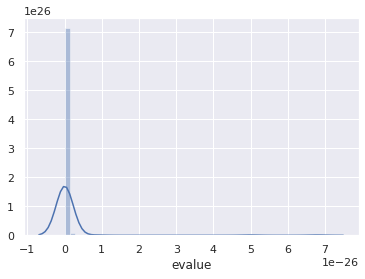

In [11]:
THRESHOLD = 1e-25

df_normalized[df_normalized["evalue"] < THRESHOLD]["evalue"]

sns.set(color_codes=True)
sns.distplot(df_normalized[df_normalized["evalue"] < THRESHOLD]["evalue"])

<AxesSubplot:xlabel='score'>

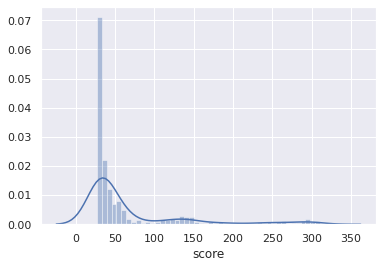

In [12]:
sns.set(color_codes=True)
sns.distplot(df_normalized["score"])

In [13]:
df_filtered = df_normalized[df_normalized["evalue"] < THRESHOLD]
df_filtered.iloc[0]["mgnify_runs"][0][0]

'SRR3963457'

In [14]:
df_filtered

,archScore,arch,kg,ndom,extlink,partial,acc2,taxid,acc,desc,biome,dcl,pvalue,flags,nregions,niseqs,name,species,score,bias,sindex,mgnify,nincluded,domains,evalue,nreported,archindex,uniprotkb,uniprot_link,mgnify_runs,mgnify_samples
0,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000191526608,01100000000,343792,-221.483986,3,1,4,MGYP000191526608,None,310.4,6.2,50523605,"{'samples': None, 'runs': [['SRR3963457', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",4.500000e-89,1,0,NaN,NaN,"[[SRR3963457, https://www.ebi.ac.uk/metagenomi...",None
1,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000202667312,01100000000,345119,-221.422379,3,1,4,MGYP000202667312,None,310.3,9.9,53609919,"{'samples': None, 'runs': [['SRR5469068', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",4.800000e-89,1,0,NaN,NaN,"[[SRR5469068, https://www.ebi.ac.uk/metagenomi...",None
2,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000002156585,01100000000,346442,-221.097783,3,1,4,MGYP000002156585,None,309.9,11.7,551566,"{'samples': None, 'runs': [['SRR5469033', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",6.600000e-89,1,0,NaN,NaN,"[[SRR5469033, https://www.ebi.ac.uk/metagenomi...",None
3,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000119647116,01100000000,347765,-220.194107,3,1,4,MGYP000119647116,None,308.6,8.9,32455208,"{'samples': None, 'runs': [['SRR3933371', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",1.600000e-88,1,0,NaN,NaN,"[[SRR3933371, https://www.ebi.ac.uk/metagenomi...",None
4,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000542480351,01000000000,349100,-219.997245,3,1,4,MGYP000542480351,None,308.3,12.6,138095481,"{'samples': None, 'runs': [['ERR2094170', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",2.000000e-88,1,0,NaN,NaN,"[[ERR2094170, https://www.ebi.ac.uk/metagenomi...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000383060417,01100000000,562850,-79.716486,3,1,4,MGYP000383060417,None,108.5,1.5,99274512,"{'samples': None, 'runs': [['SRR5266613', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",1.700000e-27,1,0,NaN,NaN,"[[SRR5266613, https://www.ebi.ac.uk/metagenomi...",None
168,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000216276020,01100000000,564089,-79.221513,3,1,4,MGYP000216276020,None,107.8,0.2,57291789,"{'samples': None, 'runs': [['SRR3989340', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",2.700000e-27,1,0,NaN,NaN,"[[SRR3989340, https://www.ebi.ac.uk/metagenomi...",None
169,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000324015875,01100000000,565360,-78.074819,3,1,4,MGYP000324015875,None,106.2,0.2,84583639,"{'samples': None, 'runs': [['SRR5494772', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': None, 'aliIdCoun...",8.500000e-27,1,0,NaN,NaN,"[[SRR5494772, https://www.ebi.ac.uk/metagenomi...",None
170,None,None,None,1,/metagenomics/sequence-search/seq?seq_ac=MGYP0...,00,<a href=https://www.ebi.ac.uk/metagenomics/run...,None,None,MGYP000414108240,01000000000,566559,-76.318081,3,1,4,MGYP000414108240,None,103.7,2.3,106869611,"{'samples': None, 'runs': [['SRR5216255', 'htt...",1,"[{'aliniseqs': 0, 'alisqacc': No

In [15]:
import requests

API_BASE = "https://www.ebi.ac.uk/metagenomics/api/latest/"

In [16]:
# create get function for sample
def ebi_runs(sample):
    response = requests.get(API_BASE + "runs/" + sample)
    return response

In [17]:
for index, row in df_filtered.iterrows():
    print(
        row["mgnify_runs"],
        row["mgnify_samples"],
    )

[['SRR3963457', 'https://www.ebi.ac.uk/metagenomics/runs/SRR3963457']] None
[['SRR5469068', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469068'], ['SRR5469034', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469034'], ['SRR5469066', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469066']] None
[['SRR5469033', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469033'], ['SRR5469068', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469068'], ['SRR5469034', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469034'], ['SRR5469066', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469066']] None
[['SRR3933371', 'https://www.ebi.ac.uk/metagenomics/runs/SRR3933371']] None
[['ERR2094170', 'https://www.ebi.ac.uk/metagenomics/runs/ERR2094170'], ['ERR2094164', 'https://www.ebi.ac.uk/metagenomics/runs/ERR2094164']] None
[['SRR5469033', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469033'], ['SRR5469068', 'https://www.ebi.ac.uk/metagenomics/runs/SRR5469068']] None
[['ERR2094166', 'https://www.ebi.ac.uk/metagenomics/ru

In [25]:
res = ebi_runs(df_filtered.iloc[0]["mgnify_runs"][0][0]).json()

# Fetch Analysis Results

In [20]:
res

{'data': {'type': 'runs',
  'id': 'SRR3963457',
  'attributes': {'experiment-type': 'metagenomic',
   'accession': 'SRR3963457',
   'secondary-accession': 'SRR3963457',
   'instrument-platform': 'ILLUMINA',
   'instrument-model': 'Illumina HiSeq 2000'},
  'relationships': {'study': {'data': {'type': 'studies',
     'id': 'MGYS00003225'},
    'links': {'related': 'https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00003225'}},
   'analyses': {'links': {'related': 'https://www.ebi.ac.uk/metagenomics/api/v1/runs/SRR3963457/analyses'}},
   'assemblies': {'links': {'related': 'https://www.ebi.ac.uk/metagenomics/api/v1/runs/SRR3963457/assemblies'},
    'data': [{'type': 'assemblies',
      'id': 'ERZ505252',
      'links': {'self': 'https://www.ebi.ac.uk/metagenomics/api/v1/assemblies/ERZ505252'}}],
    'meta': {'count': 1}},
   'pipelines': {'data': [], 'meta': {'count': 0}},
   'sample': {'data': {'type': 'samples', 'id': 'SRS1589258'},
    'links': {'related': 'https://www.ebi.ac.uk/me

# Get Assembly Data
Sampel metagenome perlu di assemble terlebih dahulu karena raw data berupa potongan sekuen DNA. Hasil assembly baru kemudian digunakan untuk analisis. Oleh karena itu, kita tidak langsung menuju "runs", tapi mencari id "assembly" untuk kemudian dicari hasil analisisnya

In [114]:
# get assembly id
assembly_id = res["data"]["relationships"]["assemblies"]['data'][0]['id']
assembly_id

'ERZ505252'

# Akses RESTFUL API EBI MGnify
Kita bisa menggunakan API dari MGnify dengan jsonapi_client via https://www.ebi.ac.uk/metagenomics/api/latest

TO DO - belum bisa menavigasi halaman / load semua halaman, contoh: https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00237664/downloads

In [ ]:
from jsonapi_client import Session, Filter

In [122]:
API_BASE_ASSEMBLIES = 'https://www.ebi.ac.uk/metagenomics/api/latest/assemblies'

with Session(API_BASE_ASSEMBLIES) as s:
    x = s.get(assembly_id, 'analyses').resource

x.downloads # sepertinya cuma load dari halaman 1 saja

[<ResourceObject: analysis-job-downloads: ERZ505252_FASTA.fasta.gz (140150853336080) (140150853336080)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_CDS_annotated.faa.gz (140150853335984) (140150853335984)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_CDS_unannotated.faa.gz (140150852935792) (140150852935792)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_interproscan.fasta.gz (140150853187808) (140150853187808)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_noFunction.fasta.gz (140150853255616) (140150853255616)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_ORF_unannotated.ffn.gz (140150853186272) (140150853186272)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_readsWithpCDS.fasta.gz (140150853186608) (140150853186608)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_GO.csv (140150852814208) (140150852814208)>,
 <ResourceObject: analysis-job-downloads: ERZ505252_FASTA_GO_slim.csv (1401508528160

## Data apa yang mau diambil?
Kita ingin mendapatkan data .biom (matrix yang berisi data spesies (taxon) dan jumlahnya (count) dalam sebuah sampel). Karena sampel berupa Whole Genome Assembly, taxon dapat disimpulkan dari beberapa dna barcode, yaitu small subunit RNA (SSU) atau large subunit RNA (LSU). Karena target kita adalah bakteri, kita akan fokus ke SSU saja karena database biodiversitasnya lebih lengkap. File biom tersedia dalam dua format, JSON atau HDF5. Format terbaru yaitu HDF5 karena mampu mengkompres data dengan lebih baik. Meskipun demikian, kita juga perlu mempertimbangkan apakah software untuk downstream analysis sudah kompatibel dengan HDF5 atau belum.

Goal: mengunduh file SSU biom dengan format JSON.

In [125]:
# kita coba lihat ekstensi apa yg tersedia untuk kita download. Note: x adalah variabel dari script sebelumnya di atas
for i in x.downloads:
    print(i.file_format)

{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'CSV', 'extension': 'csv', 'compression': False}
{'name': 'CSV', 'extension': 'csv', 'compression': False}
{'name': 'TSV', 'extension': 'tsv', 'compression': True}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'TSV', 'extension': 'tsv', 'compression': True}
{'name': 'TSV', 'extension': 'tsv', 'compression': False}
{'name': 'HDF5 Biom', 'extension': 'biom', 'compression': False}
{'name': 'JSON Biom', 'extension': 'biom', 'compression': False}
{'name': 'FASTA', 'extension': 'fasta', 'compression': True}
{'name': 'TSV', 'extension': 'tsv

In [127]:
def get_analysis_result(assemblies, extension):
    container = []
    API_BASE_ASSEMBLIES = 'https://www.ebi.ac.uk/metagenomics/api/latest/assemblies'
    with Session(API_BASE_ASSEMBLIES) as s:
        x = s.get(assemblies,'analyses').resource
        for i in x.downloads:
            if extension in i.file_format['name']:
                link = i.url
                container.append(link)
    return container

In [129]:
# file format target name: JSON Biom
print(assembly_id)
biom = get_analysis_result(assembly_id, "JSON Biom")
biom

ERZ505252


['https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00237664/file/ERZ505252_FASTA_SSU_OTU_TABLE_JSON.biom',
 'https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00237664/file/ERZ505252_FASTA_LSU_OTU_TABLE_JSON.biom']

In [ ]:
# TO DO Fetch biom untuk SSU